# **LINEAR ALGBERA IN INFORMATION RETRIEVAL**


The advent of Internet and subsequent widespread access to it has dramatically
changed the way in which we create, process and manage documents online. The traditional/manual methods of indexing and querying documents had to face challenges, both of capacity and consistency. 

The modern automated methods address the above problems. However, they too have challenges of their own. Complexity of language namely polesemy and synonymy, term and phrase weighting and zoning are few of them. We have tried to explore Information Retrieval in this light.  

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import numpy as np
from collections import OrderedDict

# **VECTOR SPACE MODEL**


1.   We store each document as a vector. Each component of the document vector reflects a particular term or keyword.
2.   The value assigned to each components represent their relative importance in describing the semantics of the document.



In [ ]:
Docs=[" Dog bites","Dog barks","Barking dogs donot bite" ]
#Here dog,bark and bites are the keywords. So we can represent each document as a vector:
#doc1 can be reprensented by (1,1,0)
#doc2 can be represented by (1,0,1)
#doc3 can be represented by (1,1,1)
doc1=np.array([1,1,0])
doc2=np.array([1,0,1])
doc3=np.array([1,1,1])



# The vector representation can be used to determine similarity between two documents. Geometrically the two vectors which are the closest will be most similar.

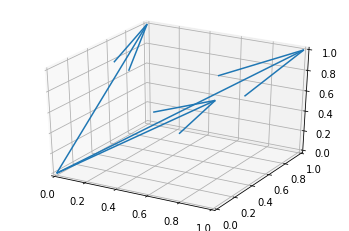

In [ ]:
fig=plt.figure()
origin=[0,0,0]
ax=fig.add_subplot(111,projection='3d')
ax.quiver(origin,origin,origin,doc1,doc2,doc3)
ax.set_xlim([0,1])
ax.set_ylim([0,1])
ax.set_zlim([0,1])
plt.show()

# Algebraically, We use **COSINE** of angle between two document vectors to measure the similarity betweeen them.

In [ ]:
#To check the similarity between the document , we calculate the cosine similarity
cos12=np.dot(doc1,doc2)/(np.linalg.norm(doc1)*np.linalg.norm(doc2))
cos13=np.dot(doc1,doc3)/(np.linalg.norm(doc1)*np.linalg.norm(doc3))
print("Cosine similairty between doc1 and doc2 is:",cos12)
print("Cosine similairty between doc1 and doc3 is:",cos13)

Cosine similairty between doc1 and doc2 is: 0.4999999999999999
Cosine similairty between doc1 and doc3 is: 0.8164965809277259


# **TERM DOCUMENT MATRIX**


# 1.   It is a t*d matrix, where d is the total number of documents in the database and t is the number of terms which can describe the semantics of the database. Each column will be a document vector and each row will be a term vector.
# 2. The user's query can also be modelled as a vector. We calculate the cosine values of query vector with each document vector and decide the similarity 



In [ ]:
#Storing our information as term document matrix is much easier:
TDM=np.array([[1,1 ,1],[1,0,1],[0,1,1]])
TDdf=pd.DataFrame(TDM,index=['dog','bite','bark'],columns=['doc1','doc2','doc3'])
TDdf

,doc1,doc2,doc3
dog,1,1,1
bite,1,0,1
bark,0,1,1


In [ ]:
#Now we can use queries to find the best match.
#Say we want to find the best match for "Barking bite".we can represent this by the vector (0,1,1)
q=np.array([0,1,1])
maxcos=0
maxdoc=0
for i in range(3):
    cossim=np.dot(q,TDM[:,i])/(np.linalg.norm(q)*np.linalg.norm(TDM[:,i]))
    if cossim>=maxcos:
        maxcos=cossim
        maxdoc=i
print("Best match for your query is doc",i+1)

Best match for your query is doc 3


In [ ]:
import nltk
from collections import defaultdict
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import  SnowballStemmer
from nltk.stem import WordNetLemmatizer
import re


In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
def remove_punctutions(x):
    pattern = r'[^a-zA-z0-9\s]'
    text = re.sub(pattern, '', x)
    return text

def stem_text(text):
    tokenizer = ToktokTokenizer()
    stemmer = SnowballStemmer('english')
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    tokens = [stemmer.stem(token) for token in tokens]
    return ' '.join(tokens)

def remove_stopwords(text):
    stopword_list = nltk.corpus.stopwords.words('english')
    tokenizer = ToktokTokenizer()
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)
    return filtered_text

def clean_document(x):
    x = remove_stopwords(x)
    x= stem_text(x)
    #x=lemma_text(x)
    x= remove_punctutions(x)
    #x=x.lstrip()
    #x=x.rstrip()
    return x

In [ ]:
docs=["How to Bake Bread Without Recipes",
      "The Classic Art of Viennese Pastry",
      "Numerical Recipes: The Art of Scientific Computing",
      "Breads,Pastry, Pies and Cakes : Quantity Baking Recipes",
      "Pastry: A Book of Best French Recipes"]


In [ ]:
clean_docs=[]
for doc in docs:
    clean_docs.append(clean_document(doc))

In [ ]:
clean_docs

['bake bread without recip',
 'classic art viennes pastri',
 'numer recip  art scientif comput',
 'bread  pastri  pie cake  quantiti bake recip',
 'pastri  book best french recip']

In [ ]:
count_vectorizer = CountVectorizer()
sparse_matrix = count_vectorizer.fit_transform(clean_docs)

doc_term_matrix = sparse_matrix.todense()
df = pd.DataFrame(doc_term_matrix, 
                  columns=count_vectorizer.get_feature_names(), 
                  index=['doc1', 'doc2', 'doc3','doc4','doc5'])

In [ ]:
terms=count_vectorizer.get_feature_names()

In [ ]:
terms

['art',
 'bake',
 'best',
 'book',
 'bread',
 'cake',
 'classic',
 'comput',
 'french',
 'numer',
 'pastri',
 'pie',
 'quantiti',
 'recip',
 'scientif',
 'viennes',
 'without']

In [ ]:
df

,art,bake,best,book,bread,cake,classic,comput,french,numer,pastri,pie,quantiti,recip,scientif,viennes,without
doc1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1
doc2,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0
doc3,1,0,0,0,0,0,0,1,0,1,0,0,0,1,1,0,0
doc4,0,1,0,0,1,1,0,0,0,0,1,1,1,1,0,0,0
doc5,0,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,0


**Term Document Matrix**

In [ ]:
df.T

,doc1,doc2,doc3,doc4,doc5
art,0,1,1,0,0
bake,1,0,0,1,0
best,0,0,0,0,1
book,0,0,0,0,1
bread,1,0,0,1,0
cake,0,0,0,1,0
classic,0,1,0,0,0
comput,0,0,1,0,0
french,0,0,0,0,1
numer,0,0,1,0,0


In [ ]:
doc_term_matrix=np.transpose(doc_term_matrix)

In [ ]:

doc_term_matrix=np.array(doc_term_matrix)

In [ ]:
doc_term_matrix

array([[0, 1, 1, 0, 0],
       [1, 0, 0, 1, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [1, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0],
       [0, 1, 0, 1, 1],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       [1, 0, 1, 1, 1],
       [0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0]])

In [ ]:
doc_term_matrix.shape

(17, 5)

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
doc_vs_doc=pd.DataFrame(data=cosine_similarity(df, df),columns=['doc1','doc2','doc3','doc4','doc5'],index=['doc1','doc2','doc3','doc4','doc5'])
doc_vs_doc

,doc1,doc2,doc3,doc4,doc5
doc1,1.000000,0.000000,0.223607,0.566947,0.223607
doc2,0.000000,1.000000,0.223607,0.188982,0.223607
doc3,0.223607,0.223607,1.000000,0.169031,0.200000
doc4,0.566947,0.188982,0.169031,1.000000,0.338062
doc5,0.223607,0.223607,0.200000,0.338062,1.000000


In [ ]:
docs=["How to Bake Bread Without Recipes",
      "The Classic Art of Viennese Pastry",
      "Numerical Recipes: The Art of Scientific Computing",
      "Breads,Pastry, Pies and Cakes : Quantity Baking Recipes",
      "Pastry: A Book of Best French Recipes"]

In [ ]:
def query_processing(terms,query):
  query=clean_document(query)
  zero_vec=np.zeros(len(terms))
  for i in range(len(terms)):
    if terms[i] in query:
      zero_vec[i]=1
  return zero_vec


In [ ]:
query_vec=query_processing(terms,'baking bread')

In [ ]:
query_vec

array([0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
no_of_docs=doc_term_matrix.shape[1]

# **Cosine Similarity is given by:**

\begin{equation}
    \cos\theta_j = \frac{a_j^Tq}{\|a_j\|2\|q\|} = \frac{\sum{i=1}^{t} a_{ij} q_{i}}{\sqrt{\sum_{i=1}^{t} a_{ij}^2} \sqrt{\sum_{i=1}^{t} q_{i}^2}}
\end{equation}

**j is the column index of doc term matrix**

**q is the query vector**

**j= 1,2, ... d where d is no of documents**

**Query Matching using Cosine Similarity**

In [ ]:
cos_similarity= OrderedDict()
for i in range(no_of_docs):
  norm_col=np.linalg.norm(doc_term_matrix[:,[i]],2)
  norm_query=np.linalg.norm(query_vec,2)
  similarity=(np.transpose(doc_term_matrix[:,[i]])@query_vec)/(norm_col*norm_query)
  cos_similarity[docs[i]]=round(float(similarity),10)

In [ ]:
cos_similarity

OrderedDict([('How to Bake Bread Without Recipes', 0.7071067812),
             ('The Classic Art of Viennese Pastry', 0.0),
             ('Numerical Recipes: The Art of Scientific Computing', 0.0),
             ('Breads,Pastry, Pies and Cakes : Quantity Baking Recipes',
              0.5345224838),
             ('Pastry: A Book of Best French Recipes', 0.0)])

Our query was **"Baking Bread"**. Cosine similarity is **non-zero** for **Document1** and **Document4**. It makes sense as well as both the documents are related to **Baking Bread**.

#**QR Factorization**


---
The QR factorization can be computed for the term document matrix which presents us with a few advantages which we will be discussing later.

\begin{equation}
A = \left(\begin{array} {cc} Q_A & Q_{A^\perp}\\
\end{array}\right)
\left(\begin{array} {c}
R_A\\
0
\end{array}\right)
\end{equation}

In [ ]:
def QR(A):
    m, n = A.shape
    Q = np.eye(m)
    for i in range(n - (m == n)):
        H = np.eye(m)
        H[i:, i:] = HouseHolder(A[i:, i])
        Q = np.dot(Q, H)
        A = np.dot(H, A)
    return Q, A
 
def HouseHolder(a):
    v = a / (a[0] + np.copysign(np.linalg.norm(a), a[0]))
    v[0] = 1
    H = np.eye(a.shape[0])
    H -= (2 / np.dot(v, v)) * np.dot(v[:, None], v[None, :])
    return H

In [ ]:
Q, R = QR(doc_term_matrix)

In [ ]:
print('Q:\n', Q.round(6))

Q:
 [[ 0.        0.5      -0.353553  0.117851 -0.135185  0.077257 -0.324119
  -0.148441 -0.031287 -0.148441 -0.278149  0.077257  0.077257 -0.379202
  -0.148441 -0.324119 -0.276731]
 [-0.5       0.        0.117851 -0.117851 -0.135185  0.047991  0.268728
   0.142515 -0.149283  0.142515  0.167436  0.047991  0.047991 -0.4487
   0.142515  0.268728 -0.489923]
 [ 0.        0.        0.        0.        0.486664  0.084027  0.228359
  -0.400837 -0.121142 -0.400837  0.191244  0.084027  0.084027 -0.284238
  -0.400837  0.228359  0.153714]
 [ 0.        0.        0.        0.        0.486664 -0.261108  0.028761
   0.176609 -0.303184  0.176609 -0.535531 -0.261108 -0.261108 -0.262893
   0.176609  0.028761  0.12479 ]
 [-0.5       0.        0.117851 -0.117851 -0.135185 -0.353794 -0.096157
  -0.194908  0.42997  -0.194908 -0.019982 -0.353794 -0.353794 -0.01662
  -0.194908 -0.096157  0.102113]
 [ 0.        0.        0.       -0.471405 -0.108148  0.763889  0.023436
  -0.011664  0.020023 -0.011664 -0.192652 

In [ ]:
print('\nR:\n', R.round(6))


R:
 [[-2.        0.       -0.5      -1.5      -0.5     ]
 [ 0.        2.        0.5       0.5       0.5     ]
 [ 0.       -0.       -2.12132  -0.       -0.235702]
 [ 0.        0.       -0.       -2.12132  -0.471405]
 [ 0.        0.       -0.        0.        2.054805]
 [ 0.       -0.       -0.       -0.        0.      ]
 [ 0.       -0.       -0.        0.       -0.      ]
 [ 0.       -0.        0.        0.        0.      ]
 [ 0.        0.       -0.       -0.       -0.      ]
 [ 0.       -0.        0.        0.        0.      ]
 [ 0.       -0.       -0.       -0.       -0.      ]
 [ 0.       -0.       -0.       -0.        0.      ]
 [ 0.       -0.       -0.       -0.        0.      ]
 [ 0.        0.        0.       -0.       -0.      ]
 [ 0.       -0.        0.        0.        0.      ]
 [ 0.       -0.       -0.        0.       -0.      ]
 [ 0.        0.       -0.       -0.       -0.      ]]


In [ ]:
Q.shape

(17, 17)

In [ ]:
R.shape

(17, 5)

**QR Facotorisation Query Matching using Cosine Similarity**

QR factorization can be used to identify and remove redundant information in the matrix representation of the database.
By lowering the rank of the matrix we are further removing components that can be attributed to the natural uncertainties present in any large database. The rank reduction steps allow us to set portions of the matrix to zero and thus to ignore them in subsequent computations. Doing so lowers the cost of query matching and helps to recoup some of the expense of computing the factorization.Cosine Similarity is given by:



\begin{equation}
    \cos \theta _j = \frac{a_j^Tq}{\|a_j\|_2\|q\|} = \frac{(Q_A r_j)^T q}{\|Q_A r_j\| _2 \|q\|_2} = \frac{r_j^T (Q_A^T q)}{\|r_j\|_2 \|q\|_2}
\end{equation}

**Q,r is QR Factorisation of doc term matrix**

**j is the column index of R matrix**

**q is the query vector**

**j= 1,2, ... d where d is no of documents**

**Geometry of the Vector Space Model**


Our query vector 'q' can be written as,
\begin{equation}
q = q_A + q_{A^\perp}
\end{equation}

In [ ]:
cos_similarity_QR= OrderedDict()
for i in range(no_of_docs):
  r_col_T=np.transpose(R[:,[i]])
  Q_T=np.transpose(Q)
  norm_r=np.linalg.norm(R[:,[i]],2)
  norm_query=np.linalg.norm(query_vec,2)
  similarity=r_col_T@(Q_T@query_vec)/(norm_r*norm_query)
  cos_similarity_QR[docs[i]]=round(float(similarity),10)

In [ ]:
cos_similarity_QR

OrderedDict([('How to Bake Bread Without Recipes', 0.7071067812),
             ('The Classic Art of Viennese Pastry', -0.0),
             ('Numerical Recipes: The Art of Scientific Computing', 0.0),
             ('Breads,Pastry, Pies and Cakes : Quantity Baking Recipes',
              0.5345224838),
             ('Pastry: A Book of Best French Recipes', -0.0)])

Our query was **"Baking Bread"**. Cosine similarity is non-zero for **Document1 and Document4**. It makes sense as well as both the documents are related to **Baking Bread**.

**Low-Rank Approximation using QR**

---



The matrix R can be written as,
\begin{equation}
R=\begin{pmatrix}
R_{11}&R_{12}\\
0&R_{22}
\end{pmatrix}
\end{equation}

For a low rank approximation we want to set this to

\begin{equation}
R=\begin{pmatrix}
R_{11}&R_{12}\\
0&0
\end{pmatrix}
\end{equation}

In [ ]:
Q1,R1=QR(doc_term_matrix)
n=R1.shape[1]
k=4
for i in range(k-1,n):
  for j in range(i,n):
    R1[i,j]=0

In [ ]:
cos_similarity_QRR= OrderedDict()
for i in range(no_of_docs):
  r_col_T=np.transpose(R1[:,[i]])
  Q_T=np.transpose(Q1)
  norm_r=np.linalg.norm(R1[:,[i]],2)
  norm_query=np.linalg.norm(query_vec,2)
  similarity=r_col_T@(Q_T@query_vec)/(norm_r*norm_query)
  cos_similarity_QRR[docs[i]]=round(float(similarity),10)
cos_similarity_QRR


OrderedDict([('How to Bake Bread Without Recipes', 0.7071067812),
             ('The Classic Art of Viennese Pastry', -0.0),
             ('Numerical Recipes: The Art of Scientific Computing', 0.0),
             ('Breads,Pastry, Pies and Cakes : Quantity Baking Recipes',
              0.6708203932),
             ('Pastry: A Book of Best French Recipes', 0.4216370214)])

**Error due to low rank approximation**


---
Error can be computed as follows:
\begin{equation}
E=Q\begin{pmatrix}
R_{11}&R_{12}\\
0&R_{22}
\end{pmatrix}-
Q\begin{pmatrix}
R_{11}&R_{12}\\
0&0
\end{pmatrix}
\end{equation}
.
\begin{equation}
E=Q\begin{pmatrix}
0&0\\
0&R_{22}
\end{pmatrix}
\end{equation}

Then,

\begin{equation}
\|E\|_F = \|R_{22}||_F \;\;\;and  \;\;\; \|A\|_F=\|R\|_F
\end{equation}

Our relative now comes out to be
\begin{equation}
\frac{\|E\|_F}{\|A\|_F}=\frac{\|R_{22}\|_F}{\|R\|_F}
\end{equation}


In [ ]:
from scipy.linalg import svd

**RANK REDUCTION USING SVD** 

---


One form of the vector space model that uses the SVD is Latent Semantic Indexing (LSI). Here is a form of SVD that we have used in this model. We use a k rank approxiation to A (term-document matrix) with rank rA.

Since,
\begin{equation}
\|A\|_F = \sqrt{\sum_{j=1}^{r_A} \sigma_{j}^2}
\end{equation} 
and 
\begin{equation}
\|A-A_k\|_F = \sqrt{\sum_{i=k+1}^{r_A} \sigma_{i}^2}
\end{equation}
The closeness to the original matrix can be compted using the following:



\begin{equation}
    \frac{\|A-A_k\|_2}{\|A\|_2}
\end{equation}

In [ ]:
#SVD
U, s, VT = svd(doc_term_matrix)
Sigma =np.zeros((doc_term_matrix.shape[0], doc_term_matrix.shape[1]))
Sigma[:doc_term_matrix.shape[1], :doc_term_matrix.shape[1]] = np.diag(s)
#Reduced rank SVD
k_elements = 3
Sigma = Sigma[:, :k_elements]
VT = VT[:k_elements, :]

In [ ]:
np.linalg.norm(doc_term_matrix-U@Sigma@VT,'fro')/np.linalg.norm(doc_term_matrix,'fro')

0.45724365986907517

Once we have computed the reduced rank SVD, calculating cosine similarity becomes a lot easier:
\begin{equation}
    \cos \theta _j = \frac{(A_ke_j)^Tq}{\|A_ke_j\|_2\|q\|_2} = \frac{(U_k\Sigma_kV_k^Te_j)^T q}{\|U_k\Sigma_kV_k^Te_j\| _2 \|q\|_2} = \frac{e_j^TV_k\Sigma_k (U_k^T q)}{\|\Sigma_kV_k^Te_j \|_2 \|q\|_2}
\end{equation}

Here we can respresent the jth column of matrix S, \begin{equation}
    s _j = \Sigma_kV_k^Te_j
\end{equation}

and cosine similarity can be computed using:

\begin{equation}
    \cos \theta _j = \frac{s_j^T(U_k^T q)}{\|s_j \|_2 \|q\|_2}
\end{equation}



In [ ]:
cos_similarity_ReducedSVD= OrderedDict()
I=np.identity(doc_term_matrix.shape[1])
S=Sigma@VT
for i in range(no_of_docs):
  s=(S@I[:,[i]])
  s_T=np.transpose(s)
  U_T=np.transpose(U)
  norm_s=np.linalg.norm(s,2)
  norm_query=np.linalg.norm(query_vec,2)
  similarity=s_T@(U_T@query_vec)/(norm_s*norm_query)
  cos_similarity_ReducedSVD[docs[i]]=round(float(similarity),10)

In [ ]:
cos_similarity_ReducedSVD

OrderedDict([('How to Bake Bread Without Recipes', 0.6721215959),
             ('The Classic Art of Viennese Pastry', -0.1956744692),
             ('Numerical Recipes: The Art of Scientific Computing',
              0.054083279),
             ('Breads,Pastry, Pies and Cakes : Quantity Baking Recipes',
              0.6217508009),
             ('Pastry: A Book of Best French Recipes', 0.0577792449)])

# Term-Term Comparison
Term-term comparison helps us refine the results of a search automatically. The entry $\cos\omega_{ij}$ shows how closely term i is associated with term j.
\begin{equation}
    \cos\omega_{ij} = \frac{(e_i^TG)(G^Te_j)}{\|G^Te_i\|_2\|G^Te_j\|_2}
\end{equation}

In [ ]:
def termterm(G):
    M = np.random.randn(np.shape(G)[0],np.shape(G)[0])
    identity = np.identity(np.shape(G)[0])
    for i in range(np.shape(G)[0]):
        for j in range(np.shape(G)[0]):
            K = np.linalg.norm(np.dot(np.transpose(G),identity[i]))
            L = np.linalg.norm(np.dot(np.transpose(G),identity[j]))
            M[i][j] = np.dot(np.dot(identity[i],G),np.dot(np.transpose(G),np.transpose(identity[j])))/(K*L)
    return M

# ![alt text](https://drive.google.com/uc?id=1KyGPg2frrupbTM0DzyH3LVf_yJ5ikYhN)

In [ ]:
termterm=termterm(doc_term_matrix)

In [ ]:
terms

['art',
 'bake',
 'best',
 'book',
 'bread',
 'cake',
 'classic',
 'comput',
 'french',
 'numer',
 'pastri',
 'pie',
 'quantiti',
 'recip',
 'scientif',
 'viennes',
 'without']

**Term by Term comparison** 

In [ ]:
pd.DataFrame(data=termterm,columns=terms,index=terms)

,art,bake,best,book,bread,cake,classic,comput,french,numer,pastri,pie,quantiti,recip,scientif,viennes,without
art,1.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.707107,0.707107,0.00000,0.707107,0.408248,0.000000,0.000000,0.353553,0.707107,0.707107,0.000000
bake,0.000000,1.000000,0.00000,0.00000,1.000000,0.707107,0.000000,0.000000,0.00000,0.000000,0.408248,0.707107,0.707107,0.707107,0.000000,0.000000,0.707107
best,0.000000,0.000000,1.00000,1.00000,0.000000,0.000000,0.000000,0.000000,1.00000,0.000000,0.577350,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000
book,0.000000,0.000000,1.00000,1.00000,0.000000,0.000000,0.000000,0.000000,1.00000,0.000000,0.577350,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000
bread,0.000000,1.000000,0.00000,0.00000,1.000000,0.707107,0.000000,0.000000,0.00000,0.000000,0.408248,0.707107,0.707107,0.707107,0.000000,0.000000,0.707107
cake,0.000000,0.707107,0.00000,0.00000,0.707107,1.000000,0.000000,0.000000,0.00000,0.000000,0.577350,1.000000,1.000000,0.500000,0.000000,0.000000,0.000000
classic,0.707107,0.000000,0.00000,0.00000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.577350,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
comput,0.707107,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,1.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.500000,1.000000,0.000000,0.000000
french,0.000000,0.000000,1.00000,1.00000,0.000000,0.000000,0.000000,0.000000,1.00000,0.000000,0.577350,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000
numer,0.707107,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,1.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.500000,1.000000,0.000000,0.000000


# Relevance Feedback
Scientific computing is rarely a straightforward application of textbook algorithms. An ideal IR system would produce high precision and high recall. How relevance feedback works is it uses most relevant documents from a set to clarify the intent of the original query.

To provide common ground for the query and document vectors, it is convinent to describe both of them in terms of the same basis vectors for the rank k approximation of the column space.

Thus,
\begin{equation}
            q_{new} = U_kU_k^Tq
\end{equation}

Now, let $a_j$ be the most relevant document vector. Then we define,
\begin{equation}
q_{new} = U_kU_k^Tq + a_j
=U_kU_k^Tq  + U_k\Sigma_kV_k^Te_j
=U_k(U_k^Tq + \Sigma_kV_k^Te_j)
\end{equation}

where $e_j$ denotes the lth canonical vector of dimension $k$


In [ ]:
items = list(cos_similarity_ReducedSVD.items())
doc_ID=0
maxcosine = items[0][1]
for i in items:
  if(maxcosine<i[1]):
    maxcosine=i[1]
    docID = i
a = doc_term_matrix[:,doc_ID]

In [ ]:

def RelevanceFeedback(qOld,U,Sigma,V,A,P):
    #A is the matrix Ak, where Ak is the rank reduced form of A
    #We choose the basis given by the columns of Uk and then work 
    #directly with the k-dimensional vectors that provide the coordinates of the vectors
    #in that basis instead of working directly with the much larger t-dimensional query
    #and document vectors
    #Sigma is the diagonal matrix with the singular values
    #V is the right matrix during SVD
    #qOld is the older query vector that we used
    #P is the array containing 1's for relevant documents and 0's for not relevant documents
    identity = np.identity(np.shape(V)[1])
    qNew = np.dot(U,np.dot(np.transpose(U),qOld)+np.dot(np.dot(Sigma,V),identity[doc_ID]))
    return qNew


In [ ]:
RelevanceFeedback(query_vec,U,Sigma,VT,doc_term_matrix,1)

array([-0.01309274,  1.79246247, -0.10280289, -0.10280289,  1.79246247,
        0.42453959, -0.15088561,  0.13779286, -0.10280289,  0.13779286,
        0.17085108,  0.42453959,  0.42453959,  0.82745244,  0.13779286,
       -0.15088561,  0.36792288])

**What actually works in Information Retrieval?**
1. Word Embeddings represents words as vectors and derives it's motivation from Vector Space Model.
2. Topic modelling techniques like LSI(Latent Semantic Indexing) uses Term Document Matrix as well as SVD decomposition.


# Word Embeddings

Embeddings are and some of the cool things we can do with them once we have them.

---

## Representing Inputs
### One-Hot Representation
Traditionally, inputs to a neural network can be represented using a **One-Hot Representation**, where we assemble a vector of N values where each value represents a given class.

For example, if we're classifying animals with our neural network, our one-hot representation may look like: < Bird, Cat, Dog, Fish > and <1,0,0,0> would represent a Bird. There are some problems with this. As the number of classes grows large, we waste a lot of space storing zeros that only tell us what we *don't* care about. Additionally, this gives us no way to represent the fact that Cats are more similar to Dogs than to Fish. 


### Embedding Representation
An **embedding** is a representation of a value in a complex dataset in relation to the entire range of possible inputs. Rather than a vector of on/off flags, we'll use a vector of floating point values, where each element represents the strength of a feature present in the input. 

---
Now let us see some action!


## Using pip to install gensim
[Gensim](https://radimrehurek.com/gensim/) is a Python library that makes it very easy to work with word embeddings. This cell may take a few moments to run as it is installed.

In [ ]:
!pip install -q gensim==3.2.0

## Downloading our pre-trained word embeddings
We're going to download a set of three million pretrained English word embeddings from a Word2Vec model that was trained on Google News. Some information from the project can be found on [this page](https://code.google.com/archive/p/word2vec/) along with the link to the Google Drive link. The next few cells will take care of this process for you.

If you are running it for the first time, it would ask you to authenticate Google Cloud SDK access to your drive. 
1. Follow the link that would be shown. 
2. Allow permissions on GDrive.
3. Copy the code from the page and paste it in the box down here.

In [ ]:
# Install the PyDrive wrapper & import libraries.
# This only needs to be done once per notebook.
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

file_id = '0B7XkCwpI5KDYNlNUTTlSS21pQmM'
downloaded = drive.CreateFile({'id':file_id})
downloaded.FetchMetadata(fetch_all=True)
downloaded.GetContentFile(downloaded.metadata['title'])

Now let us unzip the downloaded file in your VM. 
Use `!` to run bash commands in notebooks.

In [ ]:
!gunzip GoogleNews-vectors-negative300.bin.gz

gzip: GoogleNews-vectors-negative300.bin already exists; do you wish to overwrite (y or n)? n
	not overwritten


You can see the corresponding files now by doing `!ls`

In [ ]:
!ls

adc.json			    GoogleNews-vectors-negative300.bin.gz
GoogleNews-vectors-negative300.bin  sample_data


## Loading the embeddings into Gensim
The next cell will load word embeddings for the two hundred thousand most common words in English. 

The dataset will not contain excessively common "stop words" such as 'and', and others. These sorts of words don't really add to the meaning of the other words in a text and so are often omitted while training word embeddings.

While the dataset contains nearly three million words, we're going to cut it down to size so you don't have to wait as long.

In [ ]:
from gensim.models.keyedvectors import KeyedVectors
gensim_model = KeyedVectors.load_word2vec_format(
    'GoogleNews-vectors-negative300.bin', binary=True, limit=300000)

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:253: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


Here's an example of how a word is represented in our embedding space:

In [ ]:
print('hello =', gensim_model['hello'])

hello = [-0.05419922  0.01708984 -0.00527954  0.33203125 -0.25       -0.01397705
 -0.15039062 -0.265625    0.01647949  0.3828125  -0.03295898 -0.09716797
 -0.16308594 -0.04443359  0.00946045  0.18457031  0.03637695  0.16601562
  0.36328125 -0.25585938  0.375       0.171875    0.21386719 -0.19921875
  0.13085938 -0.07275391 -0.02819824  0.11621094  0.15332031  0.09082031
  0.06787109 -0.0300293  -0.16894531 -0.20800781 -0.03710938 -0.22753906
  0.26367188  0.012146    0.18359375  0.31054688 -0.10791016 -0.19140625
  0.21582031  0.13183594 -0.03515625  0.18554688 -0.30859375  0.04785156
 -0.10986328  0.14355469 -0.43554688 -0.0378418   0.10839844  0.140625
 -0.10595703  0.26171875 -0.17089844  0.39453125  0.12597656 -0.27734375
 -0.28125     0.14746094 -0.20996094  0.02355957  0.18457031  0.00445557
 -0.27929688 -0.03637695 -0.29296875  0.19628906  0.20703125  0.2890625
 -0.20507812  0.06787109 -0.43164062 -0.10986328 -0.2578125  -0.02331543
  0.11328125  0.23144531 -0.04418945  0.108398

Now let us print the vector for the word `queen`. Play around by using your own word.

In [ ]:
print('queen =', gensim_model['queen'])

queen = [ 0.00524902 -0.14355469 -0.06933594  0.12353516  0.13183594 -0.08886719
 -0.07128906 -0.21679688 -0.19726562  0.05566406 -0.07568359 -0.38085938
  0.10400391 -0.00081635  0.1328125   0.11279297  0.07275391 -0.046875
  0.06591797  0.09423828  0.19042969  0.13671875 -0.23632812 -0.11865234
  0.06542969 -0.05322266 -0.30859375  0.09179688  0.18847656 -0.16699219
 -0.15625    -0.13085938 -0.08251953  0.21289062 -0.35546875 -0.13183594
  0.09619141  0.26367188 -0.09472656  0.18359375  0.10693359 -0.41601562
  0.26953125 -0.02770996  0.17578125 -0.11279297 -0.00411987  0.14550781
  0.15625     0.26757812 -0.01794434  0.09863281  0.05297852 -0.03125
 -0.16308594 -0.05810547 -0.34375    -0.17285156  0.11425781 -0.09033203
  0.13476562  0.27929688 -0.04980469  0.12988281  0.17578125 -0.22167969
 -0.01190186  0.140625   -0.18164062  0.11865234  0.16113281  0.21484375
 -0.21191406  0.12695312 -0.10009766  0.13671875  0.12695312  0.01531982
  0.10449219 -0.02783203 -0.06030273  0.0222168 

Whoops, that's really dense. Visualizing our embeddings can help us draw conclusions about our dataset and gain some insight into what our neural network is learning.

T-SNE is an algorithm that reduces the dimensionality of our embedding vectors. The Google News Word2Vec embeddings are originally 300-dimensional, but T-Sne will let us view them collapsed into a 2D space based on their similarities.

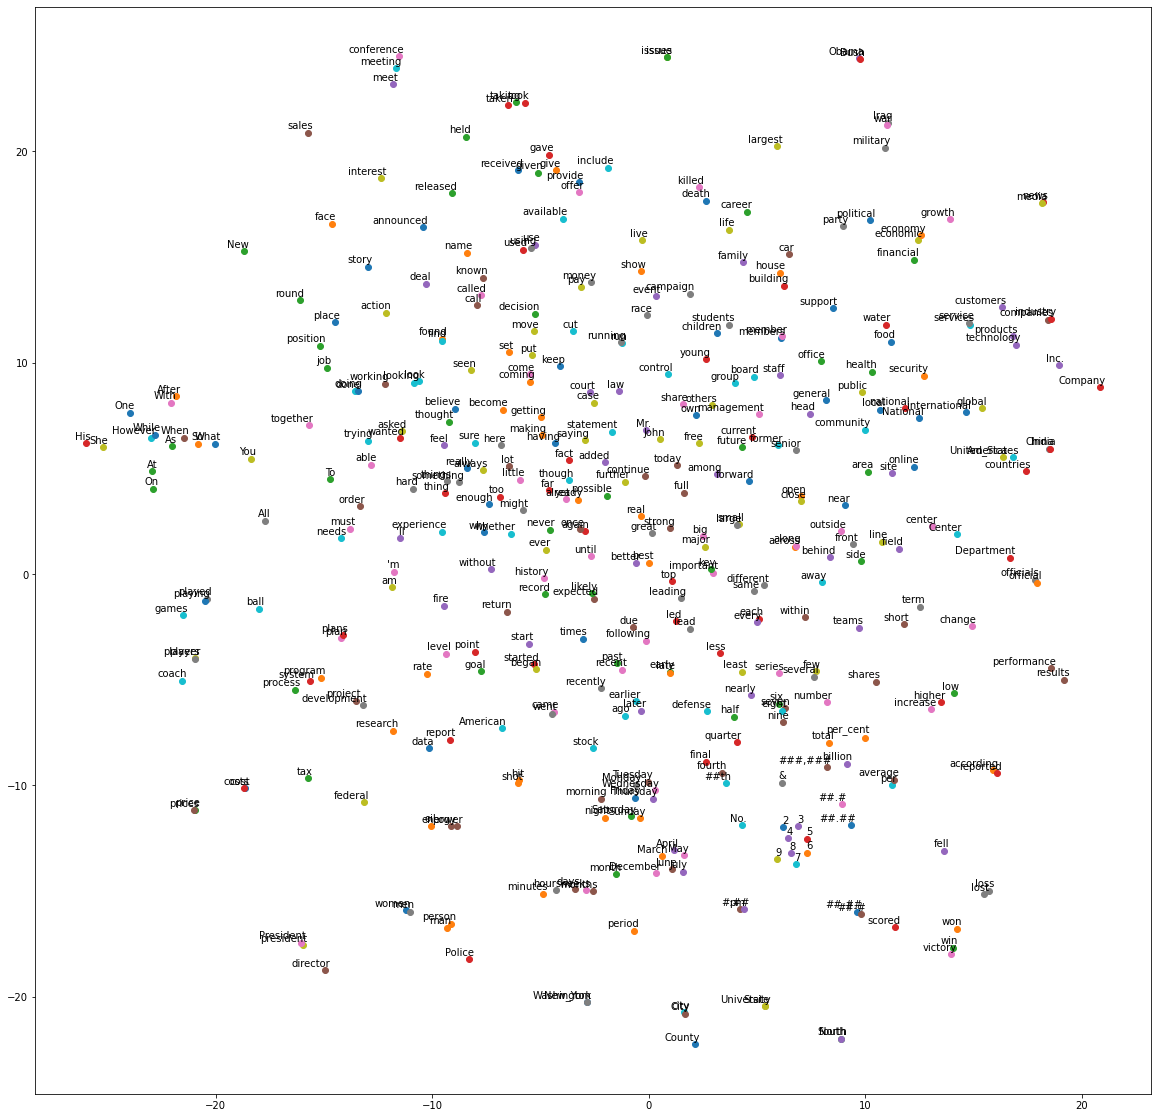

In [ ]:
from sklearn.manifold import TSNE
from matplotlib import pylab

words = [word for word in gensim_model.index2word[200:600]]
embeddings = [gensim_model[word] for word in words]
words_embedded = TSNE(n_components=2).fit_transform(embeddings)

pylab.figure(figsize=(20, 20))
for i, label in enumerate(words):
  x, y = words_embedded[i, :]
  pylab.scatter(x, y)
  pylab.annotate(label, xy=(x, y), xytext=(5, 2), textcoords='offset points',
                 ha='right', va='bottom')
pylab.show()

Note that from looking at the graph above we can see that words with similar usages appear near each other. For example,
* Words dealing with time are next to each other (minutes, hours, months, weeks, days)
* Countries appear near each other (India, China, United_States)
* US Presidents (Bush, Obama)
* Words associated with games or sports (playing, played, player, coach, gamers, players, teams)
* Numbers (2, 3, 4, 5, 6, 7, 8, 9)
* Directions (North, South)
* Words related to probability (whether, might, expected, never, sure, possible)

Can you find any other interesting ones? Try changing the [200:600] in the cell above to try another range of values.



## Interesting applications of word embeddings

Now that we have some idea of what knowledge our neural network has, let's explore some of the more interesting implications.

### Finding similar words:

In [ ]:
gensim_model.most_similar(positive=['January'])

[('February', 0.9675938487052917),
 ('October', 0.9492781162261963),
 ('December', 0.940860390663147),
 ('November', 0.9326643943786621),
 ('August', 0.9252052307128906),
 ('September', 0.9134546518325806),
 ('March', 0.8933349847793579),
 ('April', 0.8740777373313904),
 ('June', 0.8731662034988403),
 ('July', 0.8625510931015015)]

In [ ]:
gensim_model.most_similar(positive=['ablaze'])

[('afire', 0.8668453693389893),
 ('alight', 0.7645388245582581),
 ('aflame', 0.7629183530807495),
 ('torched', 0.7165234088897705),
 ('set_afire', 0.6982989311218262),
 ('torching', 0.6589720249176025),
 ('burned', 0.5929123163223267),
 ('ransacked', 0.5875048637390137),
 ('poured_kerosene', 0.58221435546875),
 ('doused', 0.5698678493499756)]

In [ ]:
gensim_model.most_similar(positive=['gentleman'])

[('gent', 0.696304202079773),
 ('gentlemen', 0.6525269150733948),
 ('chap', 0.6144852042198181),
 ('gentlemanly', 0.5343484282493591),
 ('man', 0.5337990522384644),
 ('fella', 0.513627827167511),
 ('lady', 0.5127373337745667),
 ('statesman', 0.5022931694984436),
 ('sportsman', 0.5003272294998169),
 ('Gentleman', 0.49522626399993896)]

### Combining Words:
Since our words are represented as an array of floats, we can add some together and lookup what their combination is.

```
nature + science = biology, ecology
```



In [ ]:
gensim_model.most_similar(positive=['nature', 'science'])

[('biology', 0.5784977674484253),
 ('ecology', 0.5561811923980713),
 ('scientific', 0.5484973788261414),
 ('sciences', 0.5216706395149231),
 ('botany', 0.5139989852905273),
 ('physics', 0.4938763678073883),
 ('geography', 0.4893343150615692),
 ('geology', 0.4885980486869812),
 ('mathematics', 0.4871952533721924),
 ('quantum_physics', 0.4866980314254761)]

In [ ]:
gensim_model.most_similar(positive=['woman', 'children'])

[('girl', 0.7370495796203613),
 ('child', 0.7325799465179443),
 ('mother', 0.7140079736709595),
 ('daughter', 0.6774086952209473),
 ('teenage_girl', 0.6692727208137512),
 ('toddler', 0.6545426845550537),
 ('daughters', 0.6518250107765198),
 ('boy', 0.646125316619873),
 ('mothers', 0.6391835808753967),
 ('teenagers', 0.6337636709213257)]

### Finding analogous words:

We can do math with the embedding vectors for words to find analogies between words.

king - man + woman = queen

Paris - France + Germany = Berlin

Tea - England + United_States = Coffee

North - South + West = East

In [ ]:
gensim_model.most_similar(positive=['king', 'woman'], negative=['man'])

[('queen', 0.7118192911148071),
 ('monarch', 0.6189674139022827),
 ('princess', 0.5902431011199951),
 ('crown_prince', 0.5499460697174072),
 ('prince', 0.5377321243286133),
 ('kings', 0.5236844420433044),
 ('queens', 0.518113374710083),
 ('sultan', 0.5098593235015869),
 ('monarchy', 0.5087411999702454),
 ('royal_palace', 0.5087165832519531)]

In [ ]:
gensim_model.most_similar(
    positive=['Paris', 'Germany'], 
    negative=['France'])

[('Berlin', 0.7644002437591553),
 ('Frankfurt', 0.7329736948013306),
 ('Dusseldorf', 0.7009456753730774),
 ('Munich', 0.6773864030838013),
 ('Cologne', 0.6470192670822144),
 ('Düsseldorf', 0.6399551630020142),
 ('Stuttgart', 0.6361044645309448),
 ('Munich_Germany', 0.6238142251968384),
 ('Budapest', 0.6192865371704102),
 ('Hamburg', 0.6168562769889832)]

In [ ]:
gensim_model.most_similar(positive=['Tea', 'United_States'], negative=['England'])

[('Coffee', 0.40512222051620483),
 ('Unites_States', 0.36414289474487305),
 ('tea', 0.3635876178741455),
 ('coffee', 0.3620995879173279),
 ('Teas', 0.3539789915084839),
 ('U.S.', 0.35077792406082153),
 ('Specialty_Coffee', 0.34735968708992004),
 ('teas', 0.3444087505340576),
 ('specialty_coffees', 0.3330366313457489),
 ('Untied_States', 0.3264850974082947)]

In [ ]:
gensim_model.most_similar(positive=['North', 'West'], negative=['South'])

[('East', 0.6172998547554016),
 ('Central', 0.4374283254146576),
 ('Hebron', 0.3680270314216614),
 ('Western', 0.36749526858329773),
 ('Northeast', 0.36656689643859863),
 ('NORTH', 0.3646947145462036),
 ('Northwest', 0.353318989276886),
 ('east', 0.3532946705818176),
 ('WEST', 0.349323570728302),
 ('FWL', 0.34146690368652344)]

We can put these together to programmatically modify sentences and phrases word by word, with varying results:

In [ ]:
def shift_context(sentence, from_context, to_context):
  new_sentence = []
  for word in sentence.split():
    if word in gensim_model:
      word = gensim_model.most_similar(
          positive=[word, to_context], negative=[from_context])[0][0]
    new_sentence.append(word)

  return ' '.join(new_sentence)

In [ ]:
sentence = 'restaurant serving coffee with cream and bread'
print(shift_context(sentence, 'regular', 'fancy'))

steakhouse served cappuccino snazzy frou_frou and baguettes


Unfortunately, the results are not always perfect with this approach, for example:

excellent - positive + negative = 

```
[(u'terrific', 0.5454081296920776),
 (u'superb', 0.5449916124343872),
 (u'exceptional', 0.5175209641456604),
 (u'Excellent', 0.4948967695236206),
 (u'impeccable', 0.49398699402809143),
 (u'superlative', 0.4694099426269531),
 (u'ideal', 0.4649601876735687),
 (u'fantastic', 0.46219557523727417),
 (u'abysmal', 0.4582980275154114),
 (u'atrocious', 0.45645347237586975)]
```
 The first eight results have roughly the same meaning as excellent. An unfortunate fact is that words can have many meanings across different contexts. Using these word embeddings, 
 
 ```plus - positive + negative = minus```. So the words positive and negative have become associated with mathematical sign rather than good and bad.




### Other Problems and Strategies

We run into an issue when attempting the following:


```
Austin - Texas + Oregon
```
Which yields "Corvallis" when we should expect "Salem". One way around this is to determine what relationship we want to target, in this case the full list of US States and their Capitals, and compute the average vector between our embeddings for this relationship. Gensim will let us do this by adding more parameters to the positive and negative lists.


In [ ]:
gensim_model.most_similar(
    positive=['Austin', 'Oregon'],
    negative=['Texas']
)

[('Corvallis', 0.6858817338943481),
 ('Portland', 0.6762722730636597),
 ('Lake_Oswego', 0.6627551317214966),
 ('Beaverton', 0.6624646186828613),
 ('Tualatin', 0.6581562757492065),
 ('Tigard', 0.6536808013916016),
 ('Grants_Pass', 0.6237823963165283),
 ('Roseburg', 0.6129685640335083),
 ('Boise', 0.6093173623085022),
 ('Gresham', 0.6045904159545898)]

In [ ]:
gensim_model.most_similar(
    positive=[
        'Austin', 'Atlanta', 'Nashville', 'Sacramento', 'Boston', 'Oregon'
    ],
    negative=[
        'Texas', 'Georgia', 'Tennessee', 'California', 'Massachusetts',
    ])

[('Portland', 0.5296077132225037),
 ('Seattle', 0.5245920419692993),
 ('Minneapolis', 0.4854247570037842),
 ('Milwaukee', 0.47816258668899536),
 ('Denver', 0.4711327850818634),
 ('Portland_Ore.', 0.4687800705432892),
 ('Chicago', 0.4681437313556671),
 ('Toronto', 0.4467437267303467),
 ('Vancouver', 0.4452194273471832),
 ('Beaverton', 0.4420887231826782)]

While still not the answer we were looking for, we can now see that our model has learned about the relationship between major cities and their US states in general rather than state capitals. One explanation for this could be that more populous cities are more likely to be featured in news articles when a state is mentioned.